In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split

In [2]:
file_path = './generated_dataset.csv'
data = pd.read_csv(file_path)
data.head()


,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,Website,1525,6,Topic1,2024-01-22,2024-02-02
1,user2,provider2,PPT,200,7,Topic2,2024-02-09,2024-02-14
2,user3,provider3,PPT,200,8,Topic3,2024-02-18,2024-03-02
3,user4,provider4,Website,1525,6,Topic4,2024-02-19,2024-03-01
4,user5,provider5,App,2075,6,Topic5,2024-02-12,2024-02-25


In [3]:
columns_to_keep = ['username', 'service_provider_username', 'service', 'price', 'no_of_pages', 'topic','date', 'deadline']
data = data[columns_to_keep].dropna()
data.head()



,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,Website,1525,6,Topic1,2024-01-22,2024-02-02
1,user2,provider2,PPT,200,7,Topic2,2024-02-09,2024-02-14
2,user3,provider3,PPT,200,8,Topic3,2024-02-18,2024-03-02
3,user4,provider4,Website,1525,6,Topic4,2024-02-19,2024-03-01
4,user5,provider5,App,2075,6,Topic5,2024-02-12,2024-02-25


In [4]:
y=data['price']
features=['service','no_of_pages','date','deadline']
X=data[features]
X.describe()

,no_of_pages
count,10000.00000
mean,7.78150
std,5.09619
min,1.00000
25%,4.00000
50%,6.00000
75%,10.25000
max,20.00000


In [5]:
data['date'] = pd.to_datetime(data['date'])
data['deadline'] = pd.to_datetime(data['deadline'])
data['days']=data['deadline']-data['date']



In [6]:
data.drop(['date','deadline'],axis=1,inplace=True)

In [7]:
data.drop(['username','service_provider_username'],axis=1,inplace=True)

In [8]:
data['days']=data['days'].dt.days
data.head()


,service,price,no_of_pages,topic,days
0,Website,1525,6,Topic1,11
1,PPT,200,7,Topic2,5
2,PPT,200,8,Topic3,13
3,Website,1525,6,Topic4,11
4,App,2075,6,Topic5,13


In [9]:
data.drop(['topic'],axis=1,inplace=True)

In [10]:
data

,service,price,no_of_pages,days
0,Website,1525,6,11
1,PPT,200,7,5
2,PPT,200,8,13
3,Website,1525,6,11
4,App,2075,6,13
...,...,...,...,...
9995,Website,1500,5,10
9996,Website,1500,3,15
9997,Website,1725,6,3
9998,Website,1500,5,13


<Axes: xlabel='no_of_pages', ylabel='price'>

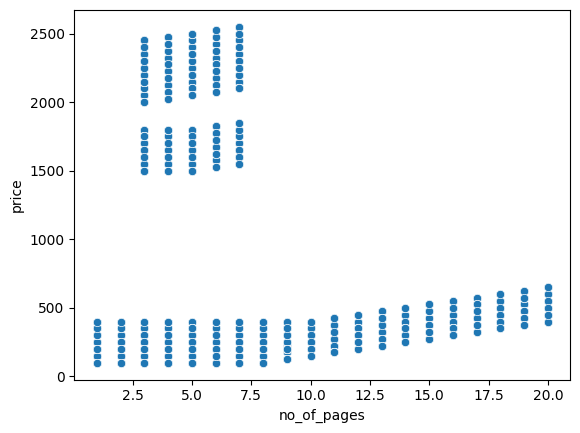

In [12]:
sns.scatterplot(x='no_of_pages',y='price',data=data)

<Axes: xlabel='days', ylabel='price'>

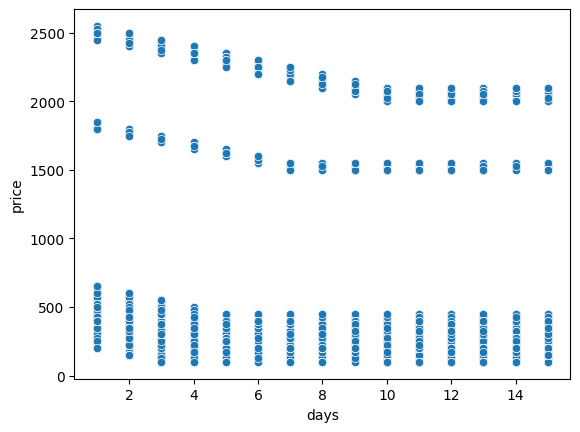

In [13]:
sns.scatterplot(x='days',y='price',data=data)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
data['service']=encoder.fit_transform(data[['service']])


<Axes: >

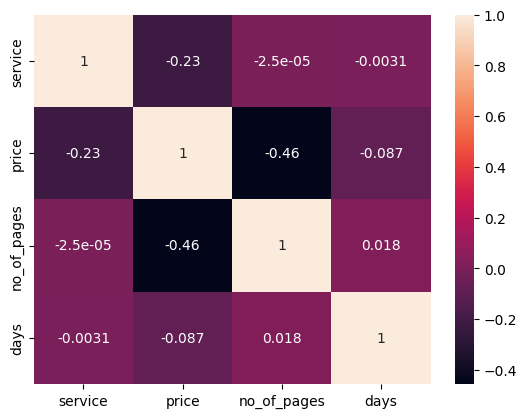

In [16]:
sns.heatmap(data.corr(),annot=True)

In [21]:
pd.crosstab(data['service'],data['price'])

price,100,125,150,175,200,225,250,275,300,325,...,2325,2350,2375,2400,2425,2450,2475,2500,2525,2550
service,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,67,111,54,100,56,106,71,60,22,33
1.0,880,112,194,98,188,126,107,129,124,112,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,911,78,176,103,183,107,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
